In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Making useful functions for later use
def showDistances(G):
    for i,j in G.edges:
        print(i,"<->",j," :",G.edges[i,j]["cost"])

def printOptimumCost(G, tour_edges : list):
        sum = 0
        for i,j in tour_edges:
                sum += G.edges[i,j]["cost"]
        return sum 

In [3]:
n = 4  #Total number of nodes
G = nx.complete_graph(n)    #Making fully connected graph with n nodes

In [4]:
#Defining the layout of the nodes - For visualisation purpose only
my_pos = {0 : (0,1), 1 : (1,1), 2 : (1,0), 3 : (0,0)}

In [5]:
#Defining weights between all different nodes
costs = pd.read_csv("Demo_Graph_Weights.csv", index_col=["Index"]).T.fillna("~")
costs

Index,0,1,2,3
0,~,15.0,35.0,30.0
1,~,~,10.0,15.0
2,~,~,~,20.0
3,~,~,~,~


In [6]:
#Adding costs to the graph network
for i,j in G.edges:
    G.edges[i,j]['cost'] = costs.to_numpy()[i][j]

{(0, 1): Text(0.5, 1.0, '15.0'),
 (0, 2): Text(0.5, 0.5, '35.0'),
 (0, 3): Text(0.0, 0.5, '30.0'),
 (1, 2): Text(1.0, 0.5, '10.0'),
 (1, 3): Text(0.5, 0.5, '15.0'),
 (2, 3): Text(0.5, 0.0, '20.0')}

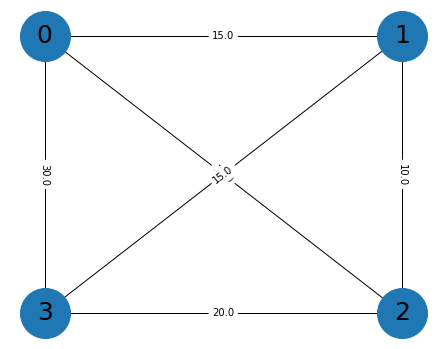

In [7]:
#Drawing the fully connected graph
plt.figure(1, figsize = (.5*12,.5*9.30376))
nx.draw(G, pos = my_pos,with_labels = True, node_size = 2500, font_size = 25)
labels = nx.get_edge_attributes(G,'cost')
nx.draw_networkx_edge_labels(G,my_pos,edge_labels=labels)

In [8]:
showDistances(G)

0 <-> 1  : 15.0
0 <-> 2  : 35.0
0 <-> 3  : 30.0
1 <-> 2  : 10.0
1 <-> 3  : 15.0
2 <-> 3  : 20.0


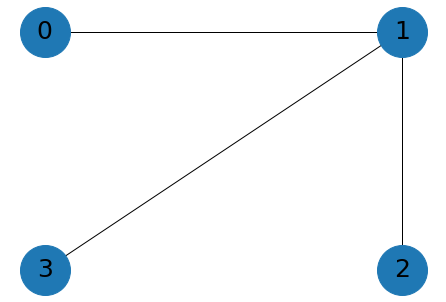

In [9]:
#Making minimum spanning tree of the graph network
T = nx.minimum_spanning_tree(G, weight='cost')
nx.draw(T, pos = my_pos, with_labels = True, node_size = 2500, font_size = 25)

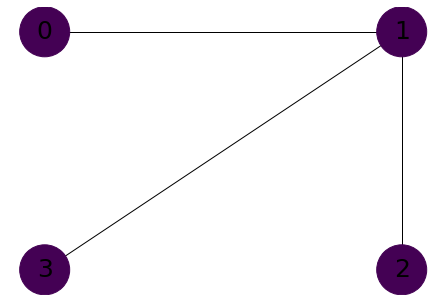

In [10]:
#Getting nodes of the minimum spanning tree which have odd degrees and showing them as different colors in the graph
odd_degree_nodes = [i for i in T.nodes if T.degree(i)%2 != 0]
color = [T.degree(i)%2 for i in T.nodes]
nx.draw(T, pos = my_pos, node_color = color, with_labels = True,node_size = 2500, font_size = 25)

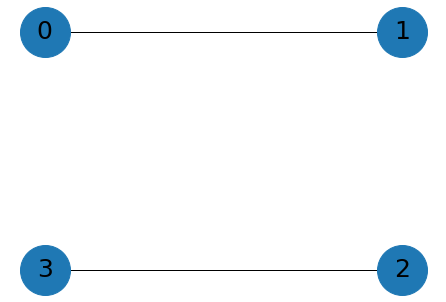

In [11]:
#Finding the minimum cost perfect matching of all the odd degree nodes
for i,j in G.edges:
    G.edges[i,j]["neg_cost"] = - G.edges[i,j]["cost"]

matching = nx.max_weight_matching(G.subgraph(odd_degree_nodes), maxcardinality = True, weight='neg_cost')
nx.draw(G.edge_subgraph(matching), pos = my_pos, with_labels = True,node_size = 2500, font_size = 25)

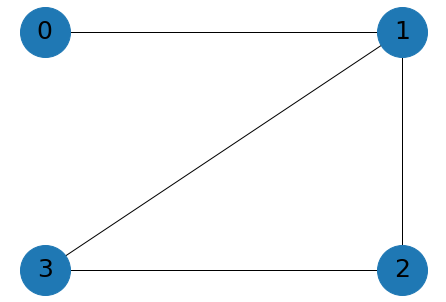

In [12]:
#Combining both the graphs to get one Eulerian graph
M = nx.MultiGraph()

M.add_nodes_from(range(n))

M.add_edges_from(T.edges())
M.add_edges_from(matching)

nx.draw(M, pos = my_pos, with_labels = True, node_size = 2500, font_size = 25)

In [13]:
s = 0

#Finding Eulerian cycle of the multigraph
initial_tour = list(nx.eulerian_circuit(M, source = s))

#Remove repeated nodes from the graph
tour = [s]

for (i,j) in initial_tour:
    if j not in tour:
        tour.append(j)
tour.append(s)

In [20]:
initial_tour

[(0, 1), (1, 3), (3, 2), (2, 1), (1, 0)]

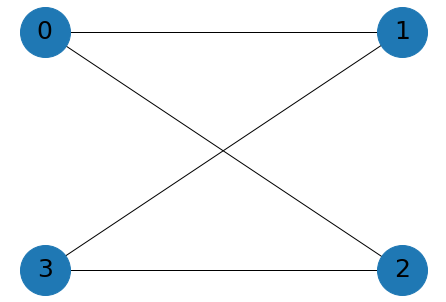

In [15]:
#Drawing the optimum tour
tour_edges = [(tour[i], tour[i+1]) for i in range(n)]
nx.draw(G.edge_subgraph(tour_edges), pos = my_pos, with_labels = True, node_size = 2500, font_size = 25)

In [16]:
#Optimum path to take
tour_edges

[(0, 1), (1, 3), (3, 2), (2, 0)]

In [17]:
printOptimumCost(G, tour_edges)

85.0